In [168]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
dataset_1 = pd.read_csv('data_set_1.csv', header=None)
dataset_2 = pd.read_csv('data_set_2.csv', header=None)

In [169]:
dataset_1.columns = ['ID', 'X1','X2']
dataset_2.columns = ['ID', 'X1','X2'] 

In [170]:
dataset_1.drop('ID', axis=1,inplace=True)
dataset_2.drop('ID', axis=1,inplace=True)

In [171]:
dataset_1.describe()

,X1,X2
count,500000.000000,500000.000000
mean,0.964454,0.578734
std,0.088880,0.150842
min,0.706779,0.220603
25%,0.897280,0.466652
50%,0.954424,0.536699
75%,1.050609,0.725401
max,1.089121,0.843336


In [172]:
dataset_1['X1'].mean()

0.9644544151730136

In [173]:
dataset_1.iloc[218551]

X1    0.861016
X2    0.431665
Name: 218551, dtype: float64

In [174]:
dataset_1['X2'].mean()

0.5787337243601255

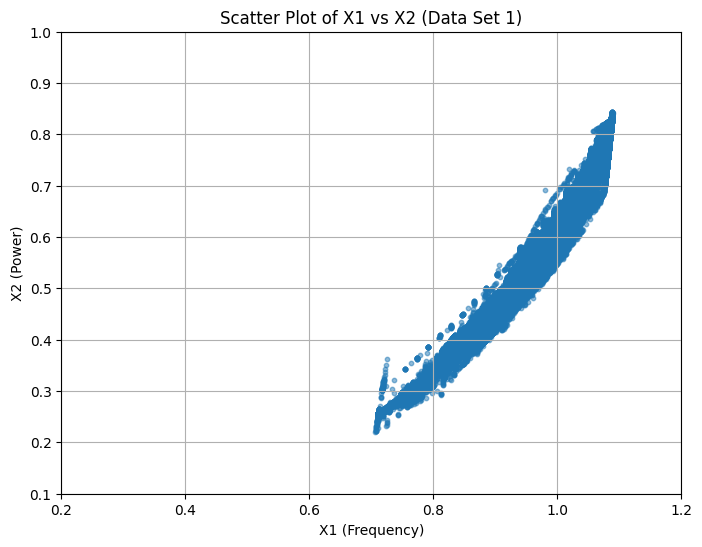

In [175]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot for the relationship between X1 and X2 in data_set_1
plt.figure(figsize=(8, 6))
plt.scatter(dataset_1['X1'], dataset_1['X2'], alpha=0.5, s=10)
plt.xlabel("X1 (Frequency)")
plt.ylabel("X2 (Power)")
plt.xlim(0.2, 1.2)
plt.ylim(0.1, 1.0)
plt.title("Scatter Plot of X1 vs X2 (Data Set 1)")
plt.grid(True)
plt.show()



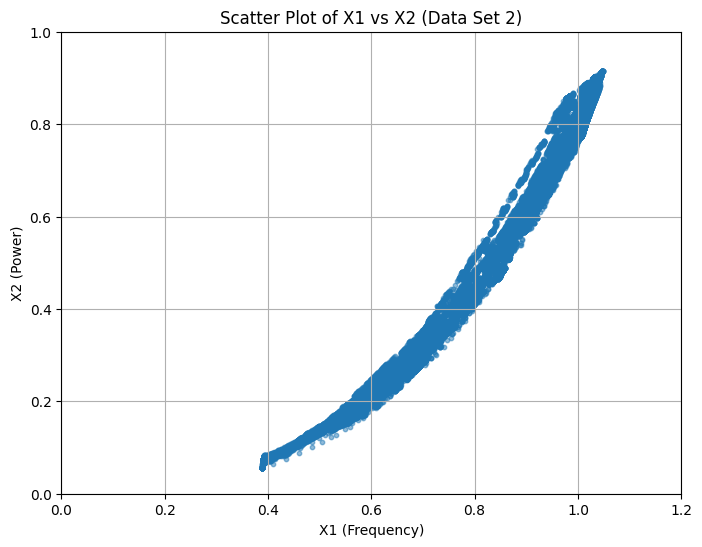

In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot for the relationship between X1 and X2 in data_set_1
plt.figure(figsize=(8, 6))
plt.scatter(dataset_2['X1'], dataset_2['X2'], alpha=0.5, s=10)
plt.xlabel("X1 (Frequency)")
plt.ylabel("X2 (Power)")
plt.xlim(0, 1.2)
plt.ylim(0, 1.0)
plt.title("Scatter Plot of X1 vs X2 (Data Set 2)")
plt.grid(True)
plt.show()

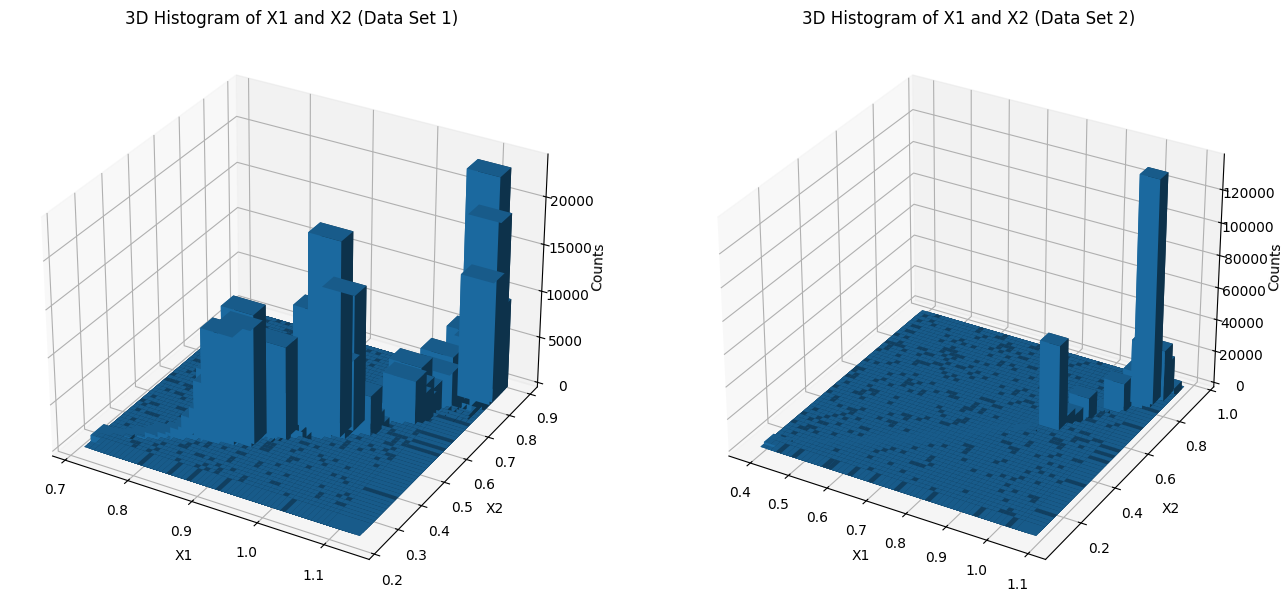

In [177]:
# 3D histogram for data_set_1
fig = plt.figure(figsize=(16, 8))

# 3D histogram for data_set_1
ax = fig.add_subplot(121, projection='3d')
hist, xedges, yedges = np.histogram2d(dataset_1['X1'], dataset_1['X2'], bins=50)

# Construct arrays for the 3D histogram bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5 * (xedges[1] - xedges[0]),
                         yedges[:-1] + 0.5 * (yedges[1] - yedges[0]), indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Plot bars
dx = dy = 0.05 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Counts')
ax.set_title("3D Histogram of X1 and X2 (Data Set 1)")

# Repeat for data_set_2
ax = fig.add_subplot(122, projection='3d')
hist, xedges, yedges = np.histogram2d(dataset_2['X1'], dataset_2['X2'], bins=50)

# Construct arrays for the 3D histogram bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5 * (xedges[1] - xedges[0]),
                         yedges[:-1] + 0.5 * (yedges[1] - yedges[0]), indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Plot bars
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Counts')
ax.set_title("3D Histogram of X1 and X2 (Data Set 2)")

plt.show()


## Normalization

In [178]:
scaler = StandardScaler()

In [179]:
scaler.fit(dataset_1)

StandardScaler()

In [180]:
dataset_1_s = scaler.transform(dataset_1)

In [181]:
dataset_2_s = scaler.transform(dataset_2)

In [182]:
dataset_1_s = pd.DataFrame(dataset_1, columns=['X1', 'X2'])


In [183]:
dataset_2_s = pd.DataFrame(dataset_2, columns=['X1', 'X2'])

In [184]:
dataset_1_s['X1'].mean()

0.9644544151730136

In [185]:
dataset_1_s['X1'].var()

0.00789957142833526

In [186]:
dataset_2_s['X1'].mean()

0.9724328805273286

In [187]:
dataset_2_s['X1'].var()

0.007201821083981956

In [188]:
dataset_1_s

,X1,X2
0,0.719791,0.317260
1,0.718572,0.308538
2,0.717821,0.303025
3,0.725701,0.363205
4,0.724039,0.350726
...,...,...
499995,1.084940,0.802320
499996,1.084961,0.802662
499997,1.084952,0.802599
499998,1.085085,0.803381


## Clustering

Representative points with wide data coverage:
              X1        X2
218551  0.861016  0.431665
256404  1.039943  0.707160
34933   0.966898  0.519346
452701  1.083961  0.804420
304924  0.827946  0.380364

Total points selected: 2500


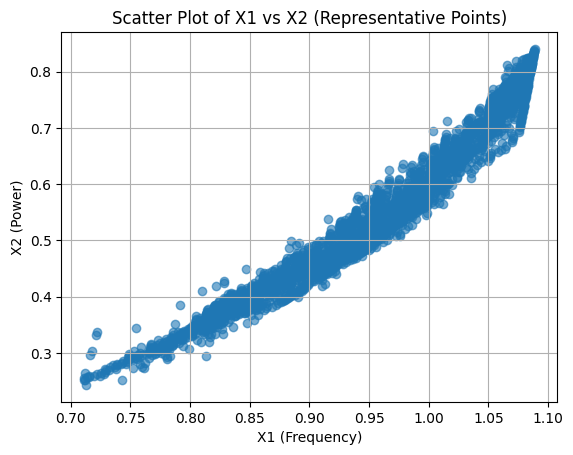

In [195]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assume dataset_1 is loaded (original 500,000 points)

# Step 1: Uniformly random sample 50,000 points to ensure broad initial coverage
sample_size = 50000  # Increase or decrease based on memory and performance needs
broad_sample = dataset_1_s.sample(n=sample_size, random_state=42)

# Step 2: Apply KMeans on the broad sample to select 2,500 representative points
n_clusters = 2500
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
broad_sample['Cluster'] = kmeans.fit_predict(broad_sample[['X1', 'X2']])

# Step 3: Select representative points closest to each cluster centroid
representative_points = []
for i in range(n_clusters):
    cluster_points = broad_sample[broad_sample['Cluster'] == i]
    if not cluster_points.empty:
        centroid = kmeans.cluster_centers_[i]
        # Calculate distances to the centroid and select the closest point
        distances = ((cluster_points[['X1', 'X2']] - centroid) ** 2).sum(axis=1)
        closest_point = cluster_points.loc[distances.idxmin()]
        representative_points.append(closest_point)

# Step 4: Ensure we have exactly 2,500 points
representative_points_df_1 = pd.DataFrame(representative_points)

# Display the final representative points ensuring full data range
print("Representative points with wide data coverage:")
print(representative_points_df_1[['X1', 'X2']].head())
print("\nTotal points selected:", len(representative_points_df_1))

representative_points_df_1.drop('Cluster',axis=1, inplace=True)

# Plot to check distribution
import matplotlib.pyplot as plt

plt.scatter(representative_points_df_1['X1'], representative_points_df_1['X2'], alpha=0.6)
plt.xlabel('X1 (Frequency)')
plt.ylabel('X2 (Power)')
plt.title('Scatter Plot of X1 vs X2 (Representative Points)')
plt.grid(True)
plt.show()


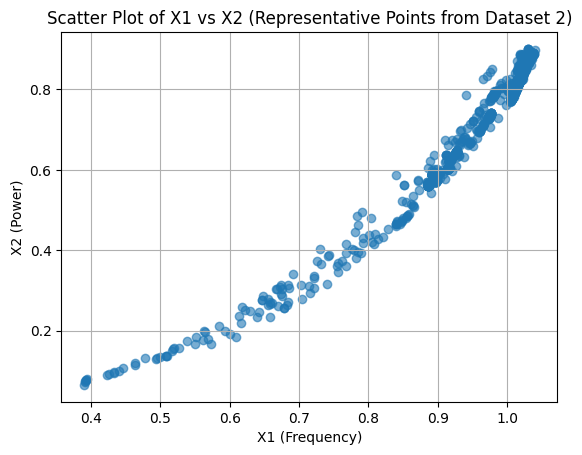

Total points selected for Dataset 1: 2500
Total points selected for Dataset 2: 2500


In [196]:
# Step 4: Apply the trained KMeans model to dataset_2 to get cluster assignments
dataset_2_s['Cluster'] = kmeans.predict(dataset_2_s[['X1', 'X2']])

# Step 5: Select representative points closest to each centroid in dataset_2
representative_points_2 = []
for i in range(n_clusters):
    cluster_points = dataset_2_s[dataset_2_s['Cluster'] == i]
    if not cluster_points.empty:
        centroid = kmeans.cluster_centers_[i]
        # Calculate distances to the centroid and select the closest point
        distances = ((cluster_points[['X1', 'X2']] - centroid) ** 2).sum(axis=1)
        closest_point = cluster_points.loc[distances.idxmin()]
        representative_points_2.append(closest_point)

# Convert representative points for dataset_2 into a DataFrame
representative_points_df_2 = pd.DataFrame(representative_points_2)


# Ensure exactly 2,500 points in representative_points_df_2
if len(representative_points_df_2) > 2500:
    representative_points_df_2 = representative_points_df_2.sample(n=2500, random_state=42)
elif len(representative_points_df_2) < 2500:
    additional_needed = 2500 - len(representative_points_df_2)
    additional_points = dataset_2.sample(n=additional_needed, random_state=42)
    representative_points_df_2 = pd.concat([representative_points_df_2, additional_points])

representative_points_df_2.drop('Cluster',axis=1, inplace=True)

# Display scatter plot for dataset_2 to check distribution
plt.scatter(representative_points_df_2['X1'], representative_points_df_2['X2'], alpha=0.6)
plt.xlabel('X1 (Frequency)')
plt.ylabel('X2 (Power)')
plt.title('Scatter Plot of X1 vs X2 (Representative Points from Dataset 2)')
plt.grid(True)
plt.show()

# Display the final count of points in dataset_2
print("Total points selected for Dataset 1:", len(representative_points_df_1))
print("Total points selected for Dataset 2:", len(representative_points_df_2))

In [197]:
representative_points_df_1

,X1,X2
218551,0.861016,0.431665
256404,1.039943,0.707160
34933,0.966898,0.519346
452701,1.083961,0.804420
304924,0.827946,0.380364
...,...,...
236037,1.082431,0.801252
345460,0.902288,0.489562
21244,0.959120,0.505671
132987,0.891036,0.441831


In [198]:
print("\nTotal unique representative points from dataset_1:", len(representative_points_df_1))


Total unique representative points from dataset_1: 2500


In [199]:
print("\nRepresentative points from dataset_2:")

representative_points_df_2



Representative points from dataset_2:


,X1,X2
434282,0.722071,0.336296
286326,0.789999,0.392211
433696,0.720833,0.306361
168763,0.910097,0.577461
169563,0.857975,0.489203
...,...,...
193762,1.028403,0.863269
247132,1.018616,0.821791
117263,0.886013,0.561313
22070,0.959136,0.695164


In [200]:
print("\nTotal unique representative points from dataset_2:", len(representative_points_df_2))


Total unique representative points from dataset_2: 2500


In [201]:
representative_points_df_1.to_excel('dataset_1_sample.xlsx')

In [202]:
representative_points_df_2.to_excel('dataset_2_sample.xlsx')